# Simulasi Menghabiskan Kapasitas Baterai Sederhana
Model <i>Discharge</i> Baterai sederhana adalah sbb<br>
C[n] = C[n-1] - I[n] * $\Delta$t

C = Kapasitas Baterai [Ah] <br>
I = Arus yang mengalir [A] <br>
$\Delta$t = Waktu Cuplik [detik]

In [1]:
## import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Simulasi 1
Parameter : <br>
Waktu = 3600 detik / 1 jam<br>
Arus = 2 A<br>
sampling = 0.1 detik<br>
Kapasitas Battery = 2 Ah

In [2]:
waktu = np.arange(0,3600,0.1)
df = pd.DataFrame({'waktu' : waktu})
df.tail()

,waktu
35995,3599.5
35996,3599.6
35997,3599.7
35998,3599.8
35999,3599.9


In [3]:
df['arus'] = 2
df.head()

,waktu,arus
0,0.0,2
1,0.1,2
2,0.2,2
3,0.3,2
4,0.4,2


In [4]:
## Mulai Simulasi

KapasitasBatterySkrg = np.zeros(len(df))
KapasitasBatterySkrg[0] = 2 #Ah

ts = 0.1

for i in df.index-1:
    try:
        KapasitasBatterySkrg[i+1] = KapasitasBatterySkrg[i] - df['arus'][i] * (ts/3600) # Konvert dari s/detik ke h/jam
    except:
        continue
df.tail()

,waktu,arus
35995,3599.5,2
35996,3599.6,2
35997,3599.7,2
35998,3599.8,2
35999,3599.9,2


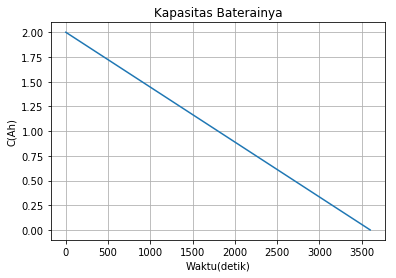

In [5]:
df['KapasitasBattery'] = KapasitasBatterySkrg
plt.plot(df['waktu'],df['KapasitasBattery'])
plt.xlabel("Waktu(detik)")
plt.ylabel("C(Ah)")
plt.title("Kapasitas Baterainya")
plt.grid()
plt.show()

In [6]:
df.tail()

,waktu,arus,KapasitasBattery
35995,3599.5,2,0.000278
35996,3599.6,2,0.000222
35997,3599.7,2,0.000167
35998,3599.8,2,0.000111
35999,3599.9,2,0.000056


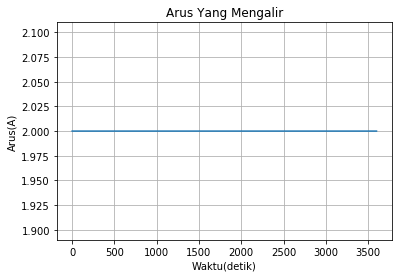

In [7]:
# df['KapasitasBattery'] = KapasitasBatterySkrg
plt.plot(df['waktu'],df['arus'])
plt.xlabel("Waktu(detik)")
plt.ylabel("Arus(A)")
plt.title("Arus Yang Mengalir")
plt.grid()
plt.show()

# Simulasi 2
Parameter : <br>
Waktu = 3600 detik / 1 jam<br>
Arus = 1 A<br>
sampling = 0.1 detik<br>
Kapasitas Battery = 2 Ah<br>
Prediksnya, baterai masih setengah dalam waktu 1 jam

In [9]:
## Mulai Simulasi

KapasitasBatterySkrg = np.zeros(len(df))
KapasitasBatterySkrg[0] = 2 #Ah
df['arus'] = 1
ts = 0.1

for i in df.index-1:
    try:
        KapasitasBatterySkrg[i+1] = KapasitasBatterySkrg[i] - df['arus'][i] * (ts/3600) # Konvert dari s/detik ke h/jam
    except:
        continue

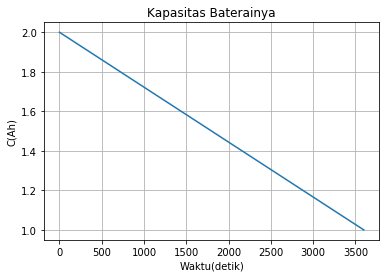

In [10]:
df['KapasitasBattery'] = KapasitasBatterySkrg
plt.plot(df['waktu'],df['KapasitasBattery'])
plt.xlabel("Waktu(detik)")
plt.ylabel("C(Ah)")
plt.title("Kapasitas Baterainya")
plt.grid()
plt.show()

In [11]:
df.tail()

,waktu,arus,KapasitasBattery
35995,3599.5,1,1.000139
35996,3599.6,1,1.000111
35997,3599.7,1,1.000083
35998,3599.8,1,1.000056
35999,3599.9,1,1.000028


## Simulasi 3
Parameter : <br>
Waktu = 3600 detik / 1 jam<br>
Arus = Non Konstant<br>
sampling = 0.1 detik<br>
Kapasitas Battery = 2 Ah<br>

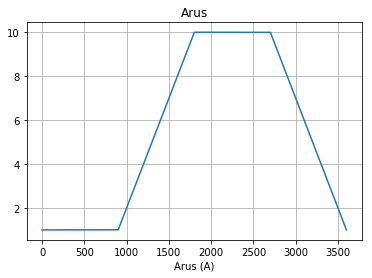

In [12]:
# definisikan funsgi mapping untuk persamaan garis lurus
def mapping(x, in_min, in_max, out_min, out_max):
    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

def makeCurrentGraph(cur):
    if (cur <= (15*60) ):
        return 1
    elif (cur > (15*60)) & (cur <= (2*15*60)):
        return mapping(cur, 15*60, 2*15*60, 1, 10)
    elif (cur > (2*15*60)) & (cur <= (3*15*60)):
        return 10
    elif (cur > (3*15*60)):
        return mapping(cur, 3*15*60, 4*15*60, 10, 1)

newcurrent = np.zeros(len(df))
    
for i in df.index:    
    newcurrent[i] = makeCurrentGraph(df['waktu'][i])
df['arus'] = newcurrent
plt.plot(df['waktu'], df['arus'])
plt.title("Arus")
plt.xlabel('waktu(detik)')
plt.xlabel('Arus (A)')
plt.grid()
plt.show()

In [13]:
## Mulai Simulasi

KapasitasBatterySkrg = np.zeros(len(df))
KapasitasBatterySkrg[0] = 2 #Ah
ts = 0.1

for i in df.index-1:
    try:
        KapasitasBatterySkrg[i+1] = KapasitasBatterySkrg[i] - df['arus'][i] * (ts/3600) # Konvert dari s/detik ke h/jam
    except:
        continue

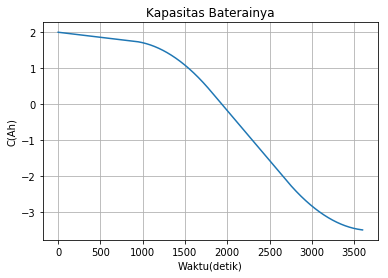

In [14]:
df['KapasitasBattery'] = KapasitasBatterySkrg
plt.plot(df['waktu'],df['KapasitasBattery'])
plt.xlabel("Waktu(detik)")
plt.ylabel("C(Ah)")
plt.title("Kapasitas Baterainya")
plt.grid()
plt.show()